# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID:   
TEAM-NAME:   
YOUR-ID:   
YOUR-NAME:   

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)


## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [18]:
#() Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
def gaussian(xVec, a, m, s):
    # Returning an array of gaussian sampled values dictated by the given parameters.
    output = []
    
    for x in xVec:
        output.append(a * math.exp(- (x - m) ** 2 / (2 * s ** 2)))
    output = np.array(output)

    return output
    
def jacobian(xVec, a, m, s):
    # Calculates the Jacobian of the gaussian distribution.
    row1 = []
    row2 = []
    row3 = []
    
    for x in xVec:
        row1.append(math.exp(- (x - m) ** 2 / (2 * s ** 2))) 
        
    for x in xVec:
        row2.append((a/(s ** 2)) * (x - m) * math.exp((- (x - m) ** 2 / (2 * s ** 2)))) 
    # For some reason the values generated here do not correspond exactly with the ones given online.
    
    for x in xVec:
        row3.append((a/(s ** 3)) * ((x - m) ** 2) * math.exp((- (x - m) ** 2 / (2 * s ** 2)))) 
    
    row1 = np.array([row1])
    row2 = np.array([row2])
    row3 = np.array([row3])
#()    print(row1.T)
#()    print(row2.T)
#()    print(row3.T)
    return np.vstack((row1, np.vstack((row2, row3))))
    
def residual(xVec, a, m, s, yObserved):
    # Calculating the residual, the difference between the observed and the calculated value
    obs = len(xVec)
    output = []
    
    for i in range(obs):
        output.append(a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])
    output = np.array(output)
        
    return output
    
def loss(xVec, a, m, s, yObserved):
    # Formulating loss as a non linear least squares optimization.
    l = 0
    obs = len(xVec)
    
    for i in range(obs):
        l += (a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i]) ** 2
        
    return l
    
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


In [19]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
# Tester code -- EVERYTHING IN ONE CELL

numberOfObservations = 3
xObserved = np.linspace(-25, 25, numberOfObservations)
a_groundTruth = 10
m_groundTruth = 0
s_groundTruth = 20
a_estimate = 10
m_estimate = 13
s_estimate = 19.12
learningRate = 0.01
iterations = 500
tolerance = 1e-2
calculatedPrameters = np.array([a_estimate, m_estimate, s_estimate])

# Single iteration

yObserved = gaussian(xObserved, a_groundTruth, m_groundTruth, s_groundTruth)
#()print(yObserved)

#()res = residual(xObserved, a_estimate, m_estimate, s_estimate, yObserved)
#()print(res)

#()jack = jacobian(xObserved, a_estimate, m_estimate, s_estimate)
#()print(jack)

#()nllsJack = np.matmul(jack.T, res)
#()print(nllsJack)

#()print(calculatedPrameters)
#()calculatedPrameters = calculatedPrameters + learningRate * nllsJack
#()print(calculatedPrameters)

for i in range(iterations):
    res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
    jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
    nllsJack = np.matmul(jack.T, res)
    calculatedPrameters = calculatedPrameters - learningRate * nllsJack
    squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
    print(squaredDistance)
    if squaredDistance <= tolerance:
        print("Convergence achieved at")
        print(calculatedPrameters)
        break
    print(calculatedPrameters)
    # Lol some nonsense is going on. Gradient ascent kathe. 
    # Interesting stuff happens when I change the sign infront of learningRate to '+'. The termination condition doesn't execute.
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

27.644033275729896
[ 9.99103324 13.01252484 19.14561794]
27.642533509502933
[ 9.98206961 13.02503704 19.17125677]
27.640814457773423
[ 9.9731093  13.0375367  19.19691614]
27.638879061268106
[ 9.96415252 13.05002392 19.22259568]
27.636730254373617
[ 9.95519948 13.06249879 19.24829503]
27.634370964675433
[ 9.94625038 13.07496141 19.27401384]
27.63180411250405
[ 9.93730543 13.08741188 19.29975174]
27.629032610488863
[ 9.92836483 13.09985028 19.32550838]
27.626059363119413
[ 9.91942878 13.11227671 19.35128341]
27.622887266314205
[ 9.91049748 13.12469125 19.37707646]
27.619519206997282
[ 9.90157112 13.137094   19.4028872 ]
27.615958062682353
[ 9.89264989 13.14948503 19.42871527]
27.612206701064594
[ 9.88373401 13.16186443 19.45456031]
27.608267979620347
[ 9.87482365 13.17423229 19.48042199]
27.60414474521452
[ 9.86591901 13.18658868 19.50629995]
27.599839833715723
[ 9.85702028 13.19893369 19.53219385]
27.595356069619328
[ 9.84812764 13.2112674  19.55810335]
27.590696265678424
[ 9.83924129 1

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
Explain your experimentations with justification here

| This          | is            | sample  |table   |
| ------------- |:-------------:| -------:|-------:|
| sample 1      | sample 1      | sample 1|sample 1|

### Answer for 1.2
Explain your experimentations with justification here

| This          | is            | sample  |table   |
| ------------- |:-------------:| -------:|-------:|
| sample 2      | sample 2      | sample 2|sample 2|



# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [2]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [48]:
def rms(X,P):
    return np.sqrt(np.square(np.sum(X-P))/X.shape[0])
def centroid(arr):
    return np.mean(arr, axis=1)
    #return (1/arr.shape[0])*np.sum(X)

In [91]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code

# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()
# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # TODO2.1: what's current error?
        rmse = rms(X,P)
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        # TODO2.3: Implement ICP to get R, t
        #Compute the centroids of each point cloud
        ux = centroid(X)
        ux = ux.reshape(ux.shape[0],1)
        up = centroid(P)
        up = up.reshape(up.shape[0],1)
        #Compute a matrix capturing the spread of the two point clouds
        w = (1/X.shape[1])*np.dot((X.astype(np.float)- ux),(P.astype(np.float)- up).T)
        #Use the singular value decomposition of the matrix to get the optimal rotation
        u, s, v_t = np.linalg.svd(w, full_matrices=True)
        d = np.linalg.det(u)*np.linalg.det(v_t)
        R = np.array([[1,0],[0,d]])
        R = u @ R @ v_t
        #Use the optimal rotation to get the optimal translation by aligning the centroids
        t = (ux - R.T@up)
        t = t.reshape(t.shape[0],1)
        P = np.dot(R,P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

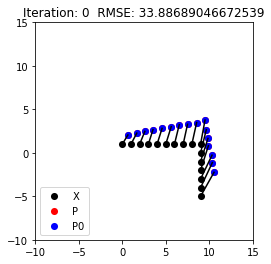

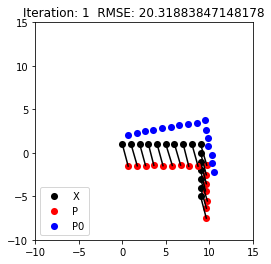

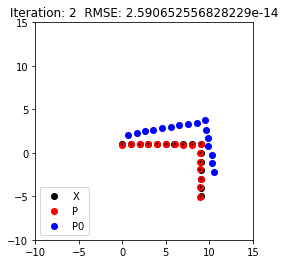

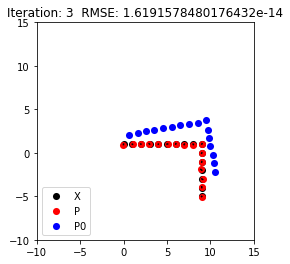

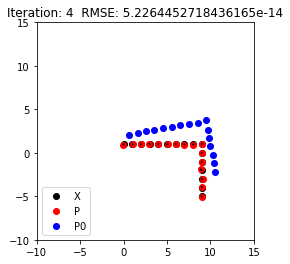

P2


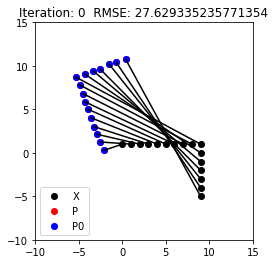

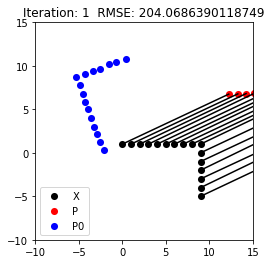

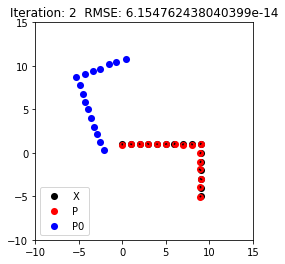

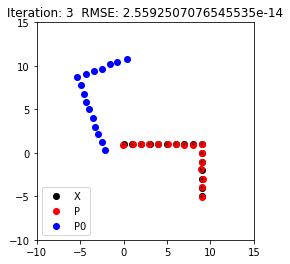

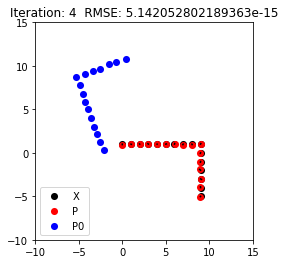

In [92]:
# Call ICP on P1 & P2
ICP(X,P1) 
print("P2")
ICP(X,P2) 